# 미리 쓰는 회고 - 각오


영문도 모르고 필사한다. 코드는 따라친다.
오늘은 제출한다. 

# 집 값 예측

In [28]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd #데이퍼프레임 관리 툴
import numpy as np  # array 배열 툴

import missingno as msno

from sklearn. ensemble import GradientBoostingRegressor
from sklearn. model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt #시각화 툴
import seaborn as sns  # 고급 시각화 툴


In [29]:
train = pd.read_csv('/content/train.csv') # 데이터 불러오기
test = pd.read_csv('/content/test.csv') #데이터 불러오는데 며칠이 걸린다. 그래도 다시 불러온다.데이터 불러와야 코딩을 하지!!

# Category

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 충수
9. waterfront: 집의 전방에 강이 흐르는지 유무
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준의 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 근처 15 가구의 주거공간, 평방 피트
21. sqft_lot15 : 근처 15가구의 부지, 평방 피트
 

In [30]:
train.head() # data feature 들을 확인


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


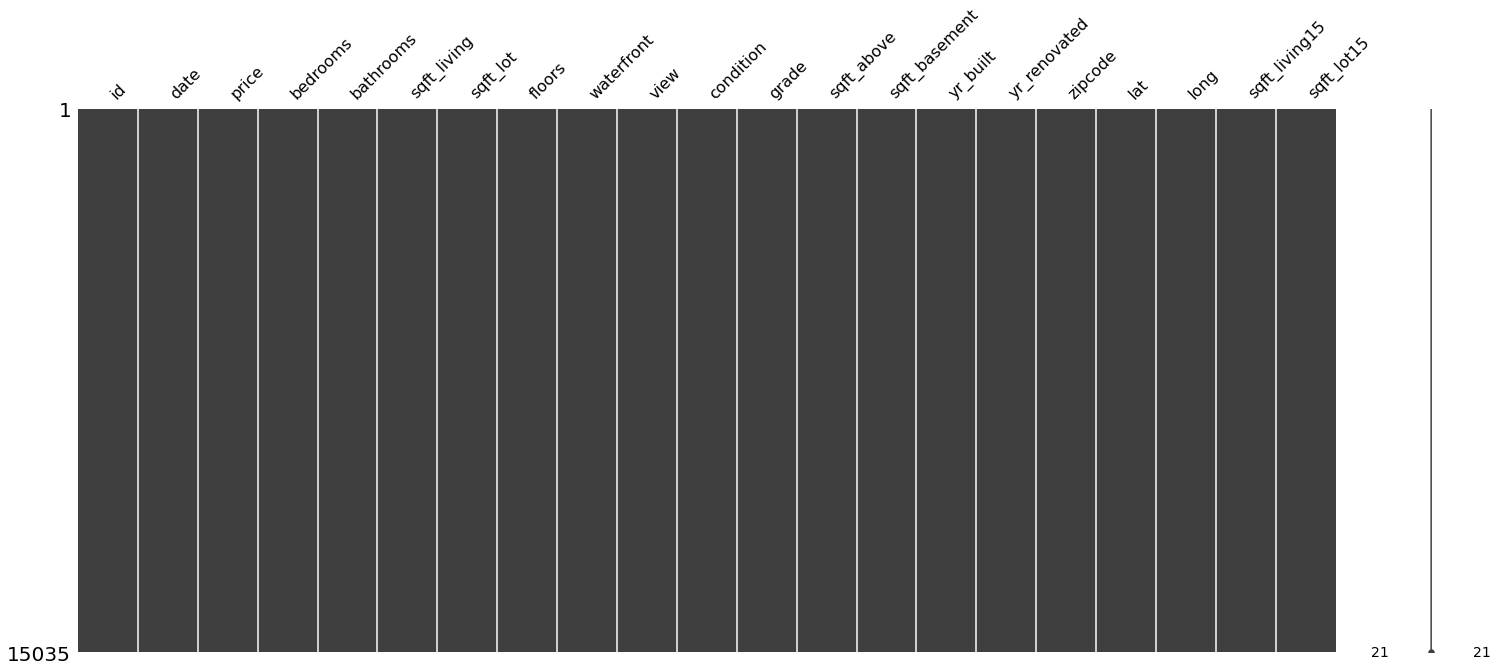

In [31]:
msno.matrix(train) # 널 값 확인

In [32]:
train.isnull().sum().sum()

0

yr_renovated, yr_built는 view로 대체 가능하기 때문에 필요 없어 보인다.- 명찬님
ID 정보는 엄청나게 필요해 보이진 않는다. date 집을 구매한 정보다 필요 없어 보인다.zip code, lat, long 이 비슷한 걸로 보아, 같은 동네인 것을 알 수 있다. 같은 동네라고 가정한다면,집 값에 영향을 주지 않는다.

In [34]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
train.drop(['id','date', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long'],axis=1,inplace=True)

In [37]:
test.drop(['id','date', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long'],axis=1,inplace=True)

In [46]:
y = train['price']
train.drop(['price'],axis=1,inplace=True)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12028, 13) (12028,)
(3007, 13) (3007,)


# 선형회귀

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
prediction = model.predict(X_test)
prediction

array([424716.82034986, 435460.2404179 , 320670.62517062, ...,
       298879.32029946, 500593.78408729, 354256.98302211])

In [55]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
mse

49683543098.94455

In [56]:
mse**0.5

222898.05539516165

**오류 값 범람 대실패**

# Average Blending

In [104]:
train_data_path = ('/content/train.csv')
test_data_path = ('/content/test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [105]:
# 카테고리 값 쓰기 위해 의미있는 수로 바꿔주기

train = pd.get_dummies(train, columns = ['yr_built', 'waterfront', 'zipcode'])
test = pd.get_dummies(test, columns = ['yr_built', 'waterfront', 'zipcode'])

In [106]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,3,...,0,0,0,0,0,0,0,0,1,0


In [107]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,3,...,0,0,0,0,0,0,0,0,1,0


In [108]:
#y에 정답값 넣기

y = train['price']
del train['price']

print(train.columns)
y.head()

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=205)


0    221900.0
1    180000.0
2    510000.0
3    257500.0
4    291850.0
Name: price, dtype: float64

In [109]:
# 선형회귀 때와 같이 카테고리를 지웠을 때, 스코어 대참사 났다고 함
# 여러번 시도 해 본 결과 이 두가지 값을 지우는게 제일 나았다고 함

del train['id'], train['date']

print(train.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=203)


In [110]:
# train과 test column을 맞춰줘야한다

test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id'], test['date']

print(test.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=203)


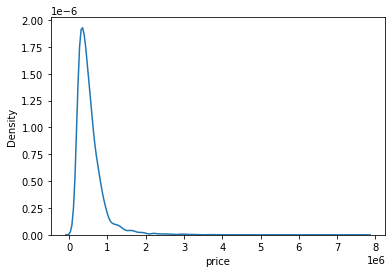

In [111]:
sns.kdeplot(y)
plt.show()

**값이 편향되어 있다는 것을 알 수 있다. 그래프 분포가 넓지 않으면, 예측 값이 편향되게 나올 수 있다.**

In [112]:
# log 를 이용하여, 값의 분포를 넓게 만들어보자

y = np.log1p(y)

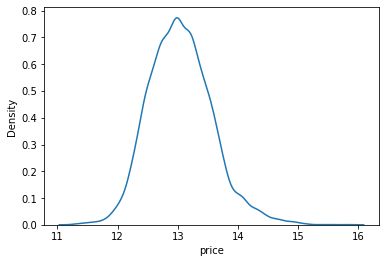

In [113]:
sns.kdeplot(y)
plt.show()

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Columns: 203 entries, bedrooms to zipcode_98199
dtypes: float64(4), int64(11), uint8(188)
memory usage: 4.4 MB


In [115]:
# rmse 오류값 측정 함수

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))) 

In [116]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [117]:
# 여러가지 함수로 돌려보자.

random_state=10

gboost = GradientBoostingRegressor(random_state=10) 
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [118]:
def get_scorce(models, train, y):
  df = {}

  for model in models:
    # 모델 이름 획득
      model_name = model.__class__.__name__

      # 모델 학습
      X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
      model.fit(X_train, y_train)

      # 예측
      y_pred = model.predict(X_test)

      # 예측 결과의 rmse(y_test, y_pred)
      df[model_name] = rmse(y_test, y_pred)

      # data frame에 저장
      score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

  return score_df 
      

In [119]:
# 하이퍼 파라미터의 서막... (???)

from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {
    'n_estimators': [608, 609, 610, 500],
    "max_depth" : [10, 9, 8]
}

In [121]:
model = LGBMRegressor(random_state=random_state)

In [122]:
grid_model = GridSearchCV(model, param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv = 5, verbose=1, n_jobs=-1)
grid_model.fit(train, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [10, 9, 8],
                         'n_estimators': [608, 609, 610, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [123]:
grid_model.best_params_

{'max_depth': 8, 'n_estimators': 500}

**"정보가 너무 많다" --- 정보가 오히려 방해가 된다는 말인가~
 필요한 정보는 어떤 파라미터 조합일 때, 점수가 어떻게 나오는 지이다.
 파라미터 조합은 params에 저장되어 있고, 테스트 점수는 mean_test_score 에 저장되어 있다.

In [124]:
# 해당 파라미터로 구성된 모델을 준비

model = LGBMRegressor(max_depth=8, n_estimators=608, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction 

array([13.10121536, 13.10316606, 14.151911  , ..., 13.06883401,
       12.67564884, 13.05461905])

In [125]:
# 예측 결과에 np.expm1()을 씌워서 다시 원래 스케일로 되돌린다.
prediction = np.expm1(prediction)
prediction 

array([ 489536.01703062,  490491.88788643, 1399898.49528711, ...,
        473938.05241594,  319862.25168767,  467248.6840021 ])

In [126]:
submission = pd.read_csv('/content/submission.csv')
submission.head()

,id,price
0,15035,5.299667e+05
1,15036,4.307262e+05
2,15037,1.361677e+06
3,15038,3.338036e+05
4,15039,3.089006e+05


In [128]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,4.895360e+05
1,15036,4.904919e+05
2,15037,1.399898e+06
3,15038,3.046650e+05
4,15039,3.418841e+05


In [136]:
submission.to_csv('/content/submission2.csv', index = False)

In [135]:
submission

,id,price
0,15035,4.895360e+05
1,15036,4.904919e+05
2,15037,1.399898e+06
3,15038,3.046650e+05
4,15039,3.418841e+05
...,...,...
6463,21498,2.188882e+05
6464,21499,4.139543e+05
6465,21500,4.739381e+05
6466,21501,3.198623e+05


In [129]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    submission_path = ('/content/submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = 'submission_{}_RMSLE_{}.csv'.format(model_name, rmsle)
    submission.to_csv(submission_csv_path)

In [130]:
save_submission(model, train, y, test, 'lgbm', rmsle='a')

# 회고

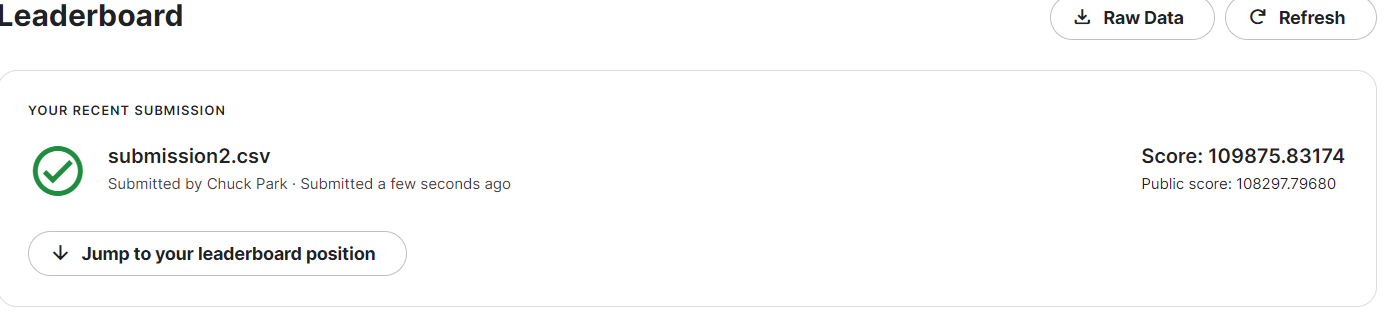

오늘은 제출할 수 있을까~
깃허브에 올리고, URL을 복사해서 제출하기 해야한다. 성취하기가 되려면. 12시 이전에.


명찬님의 회고는 직접 고민하고 실수하고 길을 찾은 사람의 땀냄새가 느껴진다.

다른 사람의 길과 발자국만 보며 똑같이 따라 걸어 보았다. 나의 보폭이 아니고 내가 걷는 방식이 아니다. 
나의 보폭과 나의 방식으로 길과 답을 찾을 때가 되면 뒷 걸음도 즐거우리라~

지나가다가도, 밥먹으려다가도, 집에 가려다가라도 나를 도와주는 그루들이 고맙다.
대단하다. 새로운 삶의 스타일을 체험하는 시간이 즐겁다.

코딩과 인공지능에 조금 익숙해지는 시간이 간절하다, 지금은 아직 꿈꾸고 있는 듯 하다.

~~~~~~이렇게 끝내고 올릴 줄로 예상 했으나...
재현님에게 도움을 요청하니 하나하나 설명을 해 준다.
미안함이 밀물, 고마움이 썰물.

최선을 다해 듣는다. 대답하고ㅡ 틀리고, 또 묻는다. 
코드를 고치는 것을 직접보고, 내손으로 직접 해보며 희열을 느낀다.

혹시 이렇게 하다가 나도 코딩 할 수 있게 되는? 그런?
진짜? 이건 꿈이야~~^^
나는 무한히 기쁘다. 오늘도 한 발 더 걸었다.